<a href="https://colab.research.google.com/github/Angeal13/Food_Vision_ML/blob/main/07_milestone_project_1_food_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mixed Training 
Google Colab Offers free GPUs,however,not all of them are compatible with Mixe Precision Traning.

Google Colab offers:
* K80 (not compatible)
* P100(not compatible)
* Tesla T4 (compatible)

Knowing this,in order to use mixed precision training we need acces to a Tessla T4 (from within Google Colab) or if using our own hardaware,the GPU need a score of 7.0+.


# Imports and Parameter

## Imports: Helper fucntions and Modules

### Helper fucntions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2021-08-07 16:43:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-07 16:43:36 (110 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
from helper_functions import *

### Imports 


In [ ]:
!pip install tensorflow==2.4.1

     |████████████████████████████████| 394.3 MB 14 kB/s 
     |████████████████████████████████| 3.8 MB 50.8 MB/s 
     |████████████████████████████████| 462 kB 65.0 MB/s 
     |████████████████████████████████| 2.9 MB 35.1 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import *
print(tf.__version__)

2.4.1


#Tensorflow Data Set


Collection of datasets ready to use,with tf,py, or ML framework:
* Exposed as `tf.data.Datasets()`
* Enables :Easy-to-use and high-performance input pipelines.

## Download Dataset from for TF dataset(TFDS)
Documentation is placed at the link:

link:https://www.tensorflow.org/api_docs/python/tf/data/Dataset


In [ ]:
#Get TensorFlow Datasets
import tensorflow_datasets as tfds

In [ ]:
#Load the data(5-6 mins in Colab)
(train_data,test_data),ds_info=tfds.load(name='food101',
                                         split=['train','validation'],
                                         shuffle_files=True,
                                         as_supervised=True,#Data gets returned in tupple format
                                         with_info=True
                                         )

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incomplete9ANCRT/food101-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incomplete9ANCRT/food101-validation.tfrecord


Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Data Details

In [ ]:
#Get features
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
#Get class Names
class_names=ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

## Exploring the Food101 data form TF DataSets

To become one with our data,we want to find:
* Class Names
*Shape of the Input(Image Tensors)
* The data type of input data(prefered float32
* What the labes look like(One-hot or label encoded)
* Do labels match up with class names


In [ ]:
train_one_sample=train_data.take(3)
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
for image,label in train_one_sample:
  print(f'''
  Image Shape: {image.shape}
  Image Datatype: {image.dtype}
  Target Class form DS(tensor form): {label}
  Class Names(str Form):{class_names[label.numpy()]}
  ''')


  Image Shape: (512, 512, 3)
  Image Datatype: <dtype: 'uint8'>
  Target Class form DS(tensor form): 71
  Class Names(str Form):paella
  

  Image Shape: (512, 512, 3)
  Image Datatype: <dtype: 'uint8'>
  Target Class form DS(tensor form): 16
  Class Names(str Form):cheesecake
  

  Image Shape: (512, 512, 3)
  Image Datatype: <dtype: 'uint8'>
  Target Class form DS(tensor form): 36
  Class Names(str Form):falafel
  


In [ ]:
#What does th eimage tensor looks like
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[140, 145, 141],
        [140, 145, 141],
        [137, 143, 139],
        ...,
        [ 78,  72,  58],
        [ 78,  72,  58],
        [ 78,  72,  58]],

       [[139, 144, 140],
        [139, 144, 140],
        [138, 144, 140],
        ...,
        [ 80,  74,  60],
        [ 80,  74,  60],
        [ 81,  75,  61]],

       [[140, 145, 141],
        [140, 145, 141],
        [138, 144, 140],
        ...,
        [ 82,  76,  62],
        [ 79,  76,  61],
        [ 79,  76,  61]],

       ...,

       [[153, 162, 161],
        [153, 162, 161],
        [152, 161, 160],
        ...,
        [166, 170, 171],
        [166, 170, 171],
        [166, 170, 171]],

       [[152, 161, 160],
        [151, 160, 159],
        [151, 160, 159],
        ...,
        [165, 169, 170],
        [165, 169, 170],
        [165, 169, 170]],

       [[153, 162, 161],
        [153, 162, 161],
        [152, 161, 160],
        ...,
        [164, 168, 16

#### Making  an Image Visible
Plot the image

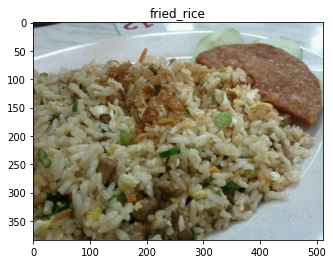

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis=False

# Prerpocesign the Data

## Create Preprocessign Fucntions
What is known about the data:
* In `unit8` datatype
*comprised if all different size tensors(images)
* Not scaled(Not normalized)

Models Preferances:
* Data in `float32` dtype(or for mixed precision `floar16` and `float32`)
* For batches,TF likes all the tensors within a batch to be of the same size
* Normalize the tensor genraly enhances performance

! Since we are using a EfficentNet model, there will not be a reason to rescale the data,since the mdoel already has a rescalling layer

In [ ]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
  """
  Converts image datatype from 'uint8' -> 'float32' and reshapes image to
  [img_shape, img_shape, color_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
  return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

In [ ]:
#Preporces a singel image and see the result
preprocessed_img=preprocess_img(image,label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape:{image.shape}\nDatatype {image.dtype}")
print(f'''
Image after preprocessing:
{preprocessed_img}
Shape: {preprocessed_img.shape}
Datatype: {preprocessed_img.dtype}
''')

Image before preprocessing:
 [[[140 145 141]
  [140 145 141]
  [137 143 139]
  ...
  [ 78  72  58]
  [ 78  72  58]
  [ 78  72  58]]

 [[139 144 140]
  [139 144 140]
  [138 144 140]
  ...
  [ 80  74  60]
  [ 80  74  60]
  [ 81  75  61]]]...,
Shape:(512, 512, 3)
Datatype <dtype: 'uint8'>

Image after preprocessing:
[[[139.35715  144.35715  140.35715 ]
  [135.7857   141.7857   137.7857  ]
  [127.571434 134.21428  130.42857 ]
  ...
  [ 82.07652   73.86226   60.43373 ]
  [ 79.61734   73.61734   59.617344]
  [ 79.51533   73.51533   59.515327]]

 [[140.66325  145.66325  141.66325 ]
  [130.70409  136.70409  132.70409 ]
  [125.311226 131.95409  129.73979 ]
  ...
  [ 85.484634  78.05611   62.270367]
  [ 81.93366   75.93366   61.933662]
  [ 77.73976   74.73976   59.73976 ]]

 [[135.93367  140.71939  137.36224 ]
  [137.19897  143.19897  141.19897 ]
  [128.62244  135.2653   133.05101 ]
  ...
  [ 86.642815  79.306114  63.382637]
  [ 87.64286   81.64286   65.64286 ]
  [ 83.928505  80.928505  65.49993

## Batch and Prerpare Data sets
Maknig the data input pipeline fats.

link:https://www.tensorflow.org/guide/data-performance

In [ ]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data,test_data



(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

# Modeling

##Creating some modeling callbacks

Createa some callbacks to help while the model trains:
* Tensoboard
* ModelCheckpoint
* EarlyStop

In [ ]:
#Create mdoelchepoint
checkpoint_path='model_checkpoints/cp.ckpt'
model_checkpoint=callbacks.ModelCheckpoint(checkpoint_path,
                                          monitor='val_acc',
                                           save_best_only=True,
                                           save_weights_only=True,
                                           verbose=0 #Dont print a Thing
                                           )

## Set up Mixed Precision Training
Fot a deeper understadnig of Mixed Precision Trainnig Link(https://www.tensorflow.org/guide/mixed_precision)

Mixed precision utilizes a combiantion of float32 adn float16 dat types to spped up model performance

In [ ]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


## Create a Feature Extraction Model
When creating a mixed precision model, th eonly cahnge that must occur is in the output layer, by setting the dtype to float32.

In [ ]:
mixed_precision.global_policy()
len(class_names)

101

In [ ]:
#Params
img_shape=(224,224,3)


#Download the Base Model
base_model =applications.EfficientNetB0(include_top=False)
base_model.trainable=False

#Create Fcuntional Model
inputs=layers.Input(shape=img_shape)
x=base_model(inputs,training=False)
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(len(class_names))(x)
outputs=layers.Activation('softmax',dtype=tf.float32,name='softmax_float_32')(x)
#Create Model
model=Model(inputs,outputs)

#compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)


16711680/16705208 [==============================] - 0s 0us/step


In [ ]:

history=model.fit(train_data,epochs=10,steps_per_epoch=len(train_data),
          validation_data=test_data,validation_steps=0.25*len(test_data),
         )

Epoch 1/10
2368/2368 [==============================] - 238s 84ms/step - loss: 2.3215 - accuracy: 0.4648 - val_loss: 1.2338 - val_accuracy: 0.6741
Epoch 2/10
2368/2368 [==============================] - 183s 77ms/step - loss: 1.3221 - accuracy: 0.6613 - val_loss: 1.1232 - val_accuracy: 0.6974
Epoch 3/10
2368/2368 [==============================] - 176s 74ms/step - loss: 1.1409 - accuracy: 0.7038 - val_loss: 1.1044 - val_accuracy: 0.6952
Epoch 4/10
2368/2368 [==============================] - 176s 74ms/step - loss: 1.0459 - accuracy: 0.7271 - val_loss: 1.0701 - val_accuracy: 0.7123
Epoch 5/10
2368/2368 [==============================] - 175s 73ms/step - loss: 0.9654 - accuracy: 0.7461 - val_loss: 1.0623 - val_accuracy: 0.7096
Epoch 6/10
2368/2368 [==============================] - 176s 74ms/step - loss: 0.9051 - accuracy: 0.7610 - val_loss: 1.0610 - val_accuracy: 0.7109
Epoch 7/10
2368/2368 [==============================] - 176s 74ms/step - loss: 0.8633 - accuracy: 0.7724 - val_loss: 1